<a href="https://colab.research.google.com/github/Elahe-hmh/ML_course/blob/master/NN_keras_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### classification MLP(Multi Layer Perceptron)

---







## **Fashion MNIST**

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape , X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [9]:
X_test.shape

(10000, 28, 28)

In [13]:
len(X_train_full[0][0])

28

**making validation data & scale the input features**

In [0]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [15]:
y_train[0]

4

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]

'Coat'

**Creating the model using the Sequential API**

let’s build the neural network!

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [0]:
hidden1 = model.layers[1]

In [0]:
weights, biases = hidden1.get_weights()

In [37]:
len(weights),weights.shape

(784, (784, 300))

In [38]:
len(biases),biases.shape

(300, (300,))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

**Training model**

In [40]:
history = model.fit(X_train, y_train, epochs=30,
... validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7236 - accuracy: 0.7663 - val_loss: 0.5168 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4893 - accuracy: 0.8301 - val_loss: 0.4478 - val_accuracy: 0.8512
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4441 - accuracy: 0.8436 - val_loss: 0.4164 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4164 - accuracy: 0.8537 - val_loss: 0.3969 - val_accuracy: 0.8686
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3980 - accuracy: 0.8600 - val_loss: 0.3818 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3810 - accuracy: 0.8650 - val_loss: 0.3780 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3679 - accuracy: 0.8703 - val_loss: 0.3743 - val_accuracy:

In [41]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [43]:
history.history

{'accuracy': [0.7663454413414001,
  0.8301272988319397,
  0.8435636162757874,
  0.8536909222602844,
  0.8600000143051147,
  0.8650363683700562,
  0.8703454732894897,
  0.8747272491455078,
  0.8767818212509155,
  0.8791090846061707,
  0.8824363350868225,
  0.8860363364219666,
  0.8878545165061951,
  0.8905818462371826,
  0.8939090967178345,
  0.8960000276565552,
  0.895763635635376,
  0.8987636566162109,
  0.8998000025749207,
  0.9014363884925842,
  0.9039272665977478,
  0.9047272801399231,
  0.9065454602241516,
  0.907945454120636,
  0.9106000065803528,
  0.9113273024559021,
  0.9129454493522644,
  0.9145636558532715,
  0.9147636294364929,
  0.9177818298339844],
 'loss': [0.7235616445541382,
  0.48933306336402893,
  0.4440629482269287,
  0.41643044352531433,
  0.39801064133644104,
  0.3810206353664398,
  0.3679158389568329,
  0.35573163628578186,
  0.3463905155658722,
  0.33774709701538086,
  0.32821404933929443,
  0.3205060064792633,
  0.31213727593421936,
  0.30579790472984314,
  0.2

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

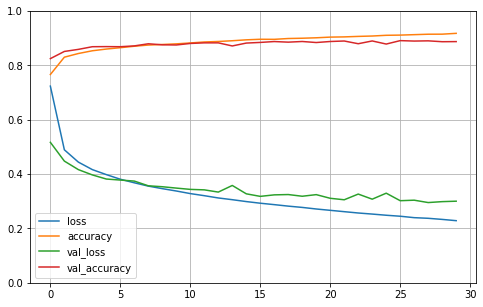

In [51]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

The validation curves are close to the training curves, which means that there is not too much overfitting.

In [0]:
X_test=X_test/255.0
y_test=y_test/255.0

In [54]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 9.3088 - accuracy: 0.0736


[9.308764457702637, 0.07360000163316727]

In [68]:
X_new = X_test[:3]
y_new = y_test[:3]

y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [58]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [64]:
y_pred 

array([9, 2, 1])

In [75]:
y_new

array([0.03529412, 0.00784314, 0.00392157])